LEVEL 2 (INTERMEDIATE) TASK 1 | HOUSE PREDICTION

DATA COLLECTION (FROM GIVEN CSV FILES)

In [73]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import re

LOAD DATASET 

In [137]:
dataset = pd.read_csv("C:/Users/Samuel Raj/Downloads/Codveda/4) house Prediction Data Set.csv")
dataset

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


PROBLEM STATEMENT

-> TO SPLIT CELL TEXT TO COLUMNS WITH ITS DELIMITER

In [ ]:
data = []
with open("C:/Users/Samuel Raj/Downloads/Codveda/4) house Prediction Data Set.csv", "r") as f:
    for line in f:
        if line.strip() == "":
            continue
        parts = re.split(r"\s{2,}", line.strip())
        if len(parts) >= 13:
            try:
                float_parts = [float(x) for x in parts]
                data.append(float_parts)
            except:
                print("⚠️ Skipped line (non-float values):", parts)
from IPython.display import clear_output
clear_output(wait=True); print("")

-> Removed Empty Lines

-> Treated csv as Text file due to double space delimiters

-> cleared output to avoid scroll element

-> converted values into float (since theres only float already)

In [75]:
house_df = pd.DataFrame(data)
house_df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63,18.6
1,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,15.6
2,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5.0,403.0,14.7,88.63,16.14,13.1
3,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79,7.5
4,11.81230,0.0,18.10,0.0,0.718,6.824,76.5,1.7940,24.0,666.0,20.2,48.45,22.74,8.4
5,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
6,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16,11.7
7,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39,8.3
8,12.24720,0.0,18.10,0.0,0.584,5.837,59.7,1.9976,24.0,666.0,20.2,24.65,15.69,10.2
9,37.66190,0.0,18.10,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52,10.9


    "CRIM",        # Per capita crime rate
    "ZN",          # Residential land zoned
    "INDUS",       # Non-retail business acres
    "CHAS",        # Charles River (0 or 1)
    "NOX",         # Nitric oxide conc
    "RM",          # Avg rooms per dwelling
    "AGE",         # % owner-occupied built before 1940
    "DIS",         # Distances to employment centers
    "RAD",         # Accessibility to highways
    "TAX",         # Property-tax rate
    "PTRATIO",     # Pupil-teacher ratio
    "B",           # Black population index
    "LSTAT",       # % lower status population
    "MEDV"         # Median home value (target variable)

In [76]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     24 non-null     float64
 1   ZN       24 non-null     float64
 2   INDUS    24 non-null     float64
 3   CHAS     24 non-null     float64
 4   NOX      24 non-null     float64
 5   RM       24 non-null     float64
 6   AGE      24 non-null     float64
 7   DIS      24 non-null     float64
 8   RAD      24 non-null     float64
 9   TAX      24 non-null     float64
 10  PTRATIO  24 non-null     float64
 11  B        24 non-null     float64
 12  LSTAT    24 non-null     float64
 13  MEDV     24 non-null     float64
dtypes: float64(14)
memory usage: 2.8 KB


DATA CLEANING AND PREPROCESSING

In [77]:
print("No Duplicates Found !" if house_df.shape[0] == house_df.drop_duplicates().shape[0] else house_df.drop_duplicates())

No Duplicates Found !


In [78]:
house_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [87]:
X = house_df.drop("MEDV", axis=1)
y = house_df["MEDV"]
X.shape[0], X.shape[1]

(24, 13)

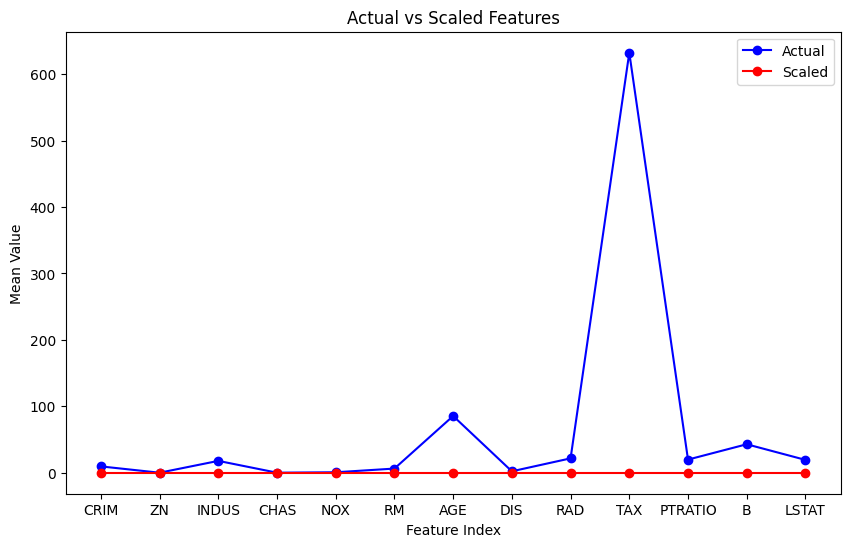

In [88]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.plot(np.mean(X, axis=0), label='Actual', marker='o', color='blue')
plt.plot(np.mean(X_scaled, axis=0), label='Scaled', marker='o', color='red')
plt.legend(); plt.xlabel('Feature Index'); plt.ylabel('Mean Value')
plt.title('Actual vs Scaled Features')
plt.show();

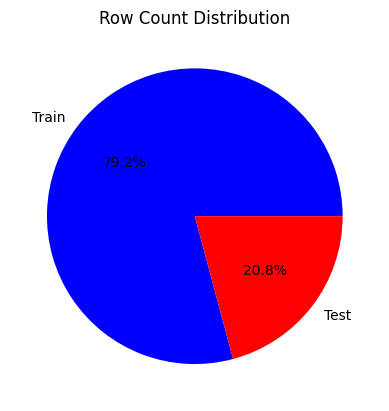

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
plt.pie([X_train.shape[0], X_test.shape[0]], labels=['Train', 'Test'], colors=['blue', 'red'], autopct='%1.1f%%')
plt.title('Row Count Distribution')
plt.show();

TASK 1 (REGRESSION MODELLING)

LINEAR REGRESSION

In [94]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [103]:
lm_pred = lm.predict(X_test)
pred_lm = np.round(lm_pred,decimals=1)
lm_r2 = r2_score(y_test, lm_pred)
lm_mae = mean_absolute_error(y_test, lm_pred)
lm_mse = mean_squared_error(y_test, lm_pred)
lm_rmse = np.sqrt(lm_mse)
pd.DataFrame({"Predicted":lm_pred,"Actual":y_test})

,Predicted,Actual
8,11.920013,10.2
16,7.456849,8.4
0,24.490400,18.6
18,12.529315,13.4
11,11.095965,9.5


In [115]:
print(f"Mean Absolute Error: {round(lm_mae, 3)} \nMean Square Error: {round(lm_mse, 3)} \nRoot MSE: {round(lm_rmse, 3)} \nR-squared (%): {round(lm_r2 * 100, 2)}%")

Mean Absolute Error: 2.204 
Mean Square Error: 8.37 
Root MSE: 2.893 
R-squared (%): 38.43%


DECISION TREE

In [95]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [104]:
dt_pred = dt.predict(X_test)
dt_r2 = r2_score(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
pd.DataFrame({"Predicted":dt_pred,"Actual":y_test})

,Predicted,Actual
8,10.9,10.2
16,8.4,8.4
0,15.6,18.6
18,14.1,13.4
11,11.8,9.5


In [116]:
print(f"Mean Absolute Error: {round(dt_mae, 3)} \nMean Square Error: {round(dt_mse, 3)} \nRoot MSE: {round(dt_rmse, 3)} \nR-squared (%): {round(dt_r2 * 100, 2)}%")

Mean Absolute Error: 1.34 
Mean Square Error: 3.054 
Root MSE: 1.748 
R-squared (%): 77.53%


RANDOM FOREST

In [96]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [105]:
rf_pred = rf.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
pd.DataFrame({"Predicted":rf_pred,"Actual":y_test})

,Predicted,Actual
8,10.209,10.2
16,8.659,8.4
0,15.732,18.6
18,14.417,13.4
11,12.751,9.5


In [123]:
print(f"Mean Absolute Error: {round(rf_mae, 3)} \nMean Square Error: {round(rf_mse, 3)} \nRoot MSE: {round(rf_rmse, 3)} \nR-squared (%): {round(rf_r2 * 100, 2)}%")

Mean Absolute Error: 1.481 
Mean Square Error: 3.979 
Root MSE: 1.995 
R-squared (%): 70.73%


MODEL OF THREE RESULTS

In [124]:
result = {'MAE': [lm_mae, dt_mae, rf_mae],
    'MSE': [lm_mse, dt_mse, rf_mse],
    'RMSE': [lm_rmse, dt_rmse, rf_rmse],
    'R2': [lm_r2, dt_r2, rf_r2]}
result = pd.DataFrame(result, index=["Linear Regression", "Decision Tree", "Random Forest"])
result

,MAE,MSE,RMSE,R2
Linear Regression,2.204043,8.369998,2.893095,0.384269
Decision Tree,1.340000,3.054000,1.747570,0.775335
Random Forest,1.480800,3.979175,1.994787,0.707276


R-SQUARED (ACCURACY) CHART

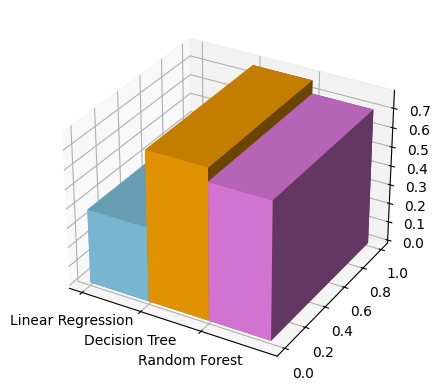

In [138]:
fig = plt.figure(); ax = fig.add_subplot(111, projection='3d')
x = np.arange(3); y = np.zeros(3); z = np.zeros(3)
dx = np.ones(3); dy = np.ones(3); dz = result['R2']
ax.bar3d(x, y, z, dx, dy, dz, color=['skyblue','orange','violet'])
ax.set_xticks(x); ax.set_xticklabels(result.index)
plt.show();

In [139]:
best_model = None
for index, row in result.iterrows():
    if 0.70 <= row['R2'] <= 0.95 and row['MAE'] == result['MAE'].min():
        best_model = index
        break
print(f"{best_model} is the best model with {result['R2'].max()*100:.2f}% accuracy" if best_model else "No model satisfies the conditions !")

Decision Tree is the best model with 77.53% accuracy
